# Assessment 1

This assignment explores the use of Python’s data carpentry, visualization and analysis tools to investigate a small
dataset of parts lists associated with three catagories of IKEA beds: Double, Single and Guest beds.

Your objective is to create a Python notebook that demonstrates your knowledge of:
### 1. Data Cleaning: 
Write python code that summarizes the size and shape of the data allocated to you and
cleans it to remove any inconsistency in the format. These spread sheets have been created from a
combination of webpage scrapping, extracting text from pdf of assembly instructions and manual entry.
Consequently, there are errors, outliners and inconsistencies in the formatting. You should record any
choices or assumption you make (e.g. how to deal with multiple part codes such as ‘113434/122332’) in
comments in the Python code and also the markdown cells between the code cells of the notebook. We
Part No Quantity
101359 12
110789 20
105163 8
117327 12
102267 8
102372 6
are looking for code to automate this step, no marks will be given for manual processes of the data with,
say, Excell
[10 marks]  

### 2. Data Merge: 
Write Python code that combines your datasets and ranks the components by the frequency
of their use in the bed designs. Again, there will be choice about how identical and different part numbers
are handled. The approach adopted should be described in the comments and markdown cells of the
notebook.
[10 marks]  

### 3. Data Analysis:  
Write python code that calculates the percentage of components in each bed which are
unique? The approach adopted should be described in the comments and markdown cells of the notebook.
[10 marks]  

### 4. Data Discovery:  
Apply the analysis method of your choice to the combined dataset. Next week the
workshop notebook will give some examples of using python libraries that do cluster analysis1 and
association rule mining2 to identify families of products in terms of components they share. However, you
are free to use any method that provides an insight into the structure of your data. Your notebook should
include a number of cells that give a brief overview of the method you are using.
[15 marks]  

### 5. Conclusions:
Your notebook should end with a brief discussion and visualization of the results and how
they could be used to improve the productivity.
[5 marks]  

============================================================================================================================

In [1]:
# install Dtale
# https://towardsdatascience.com/d-tale-one-of-the-best-python-libraries-you-have-ever-seen-c2deecdfd2b
# !pip install dtale

## 1. Data Cleanning
#### 1.1. Background
- there are two datasets assigned per student to be used, in my case I have to use: "DBmatrixc.csv" & "SBmatrixc.csv"
- This assignment explores the use of Python’s data carpentry, visualization and analysis tools to investigate a small dataset of parts lists associated with three catagories of IKEA beds.  

#### 1.2. Initialise and read the data
- import pandas to initialise the package
- load and create first dataset based on "DBmatrixc.csv"
- get the dataset shape and size
- analyse table content and data types in columns


In [2]:
# define first DB dataset
# initialise pandas
import pandas as pd
import dtale
# initial error while loading the dataset, using the [encoding = 'unicode_escape'] has sorted the error below
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 115: invalid start byte
DB_df = pd.read_csv('DBmatrixc.csv',encoding = 'unicode_escape')
# print head to get an idea of the data
DB_df.head()

,Unnamed: 0,ASKVOLL_115_,BRIMNES_179_15,BRIMNES_199_19,BRIMNES_265_17,BRUSALI_129_,BRUSALI_164_20,BRUSALI_199_4,FJELLSE_59_,GJRA_199_,...,MALM_209_2,MALM_249_5,MALM_279_,NESTTUN_99_,NORDLI_279_,TARVA_109_,TRYSIL_115_,TYSSEDAL_275_,UNDREDAL_299_,Unnamed: 24
0,100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,...,NaN,NaN,1.0,NaN,NaN,1.0,1,0,0,NaN
1,100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,0,0,0,NaN
2,100006,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,0,0,0,NaN
3,100049,1,1,1,1,1,1,1,NaN,1,...,1.0,1.0,1.0,NaN,NaN,NaN,0,1,1,NaN
4,100087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN


In [3]:
# print dataframe size as in (rows, columns)
print(DB_df.shape)

(132, 25)


In [4]:
# use detale to show all data if neded
# note using dtale seem to take a bit of time to load up the results
# dtale.show(DB_df)

In [5]:
#get full details and counts of the data within columns
DB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      132 non-null    object 
 1   ASKVOLL_115_    14 non-null     object 
 2   BRIMNES_179_15  38 non-null     object 
 3   BRIMNES_199_19  26 non-null     object 
 4   BRIMNES_265_17  45 non-null     object 
 5   BRUSALI_129_    27 non-null     object 
 6   BRUSALI_164_20  31 non-null     object 
 7   BRUSALI_199_4   31 non-null     object 
 8   FJELLSE_59_     20 non-null     object 
 9   GJRA_199_      25 non-null     object 
 10  HEMNES_175_     28 non-null     object 
 11  HEMNES_315_1    32 non-null     object 
 12  KOPARDAL_99_    19 non-null     object 
 13  LEIRVIK_89_     21 non-null     object 
 14  MALM_169_       26 non-null     object 
 15  MALM_209_2      22 non-null     float64
 16  MALM_249_5      22 non-null     float64
 17  MALM_279_       34 non-null     flo

   
  
    
- Looking at the column name **"Unnamed: 24"** it seem to have no values, a closer look at the column and values is needed, if no volues are found te column can be removed, as it might have been created during the website data scraping

- indeed the colum proves to have no real values, therefore it will get removed

In [6]:
# using sorted will force Jupiter to print all values make it easyer to look over all values in the column
sorted(DB_df['Unnamed: 24'])

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [7]:
# remove in place the column 'Unnamed: 24'
DB_df.drop('Unnamed: 24', 1, inplace=True)
# DB_df.head()
#
#confirm column was deleted
DB_df.columns 

Index(['Unnamed: 0', 'ASKVOLL_115_', 'BRIMNES_179_15', 'BRIMNES_199_19',
       'BRIMNES_265_17', 'BRUSALI_129_', 'BRUSALI_164_20', 'BRUSALI_199_4',
       'FJELLSE_59_', 'GJRA_199_', 'HEMNES_175_', 'HEMNES_315_1',
       'KOPARDAL_99_', 'LEIRVIK_89_', 'MALM_169_', 'MALM_209_2', 'MALM_249_5',
       'MALM_279_', 'NESTTUN_99_', 'NORDLI_279_', 'TARVA_109_', 'TRYSIL_115_',
       'TYSSEDAL_275_', 'UNDREDAL_299_'],
      dtype='object')

- Analysing the column names it seems that the first one **'Unnamed: 0'** and some others do not have a proper name
- investigate the values within the column
- based on data type it seem to be "Object" which indicates that values are either a mix of types, or a string type (Jupiter seem to tag string type as object)

In [8]:
# rename columns to give them an appropriate name and remove spurious characters
DB_df.rename(columns = {'Unnamed: 0'    : 'Item_ID', 
                        'ASKVOLL_115_'  : 'ASKVOLL_115', 
                        'BRUSALI_129_'  : 'BRUSALI_129', 
                        'FJELLSE_59_'   : 'FJELLSE_59', 
                        'GJRA_199_'    : 'GJ-RA_199', 
                        'HEMNES_175_'   : 'HEMNES_175', 
                        'KOPARDAL_99_'  : 'KOPARDAL_99', 
                        'LEIRVIK_89_'   : 'LEIRVIK_89', 
                        'MALM_169_'     : 'MALM_169', 
                        'MALM_279_'     : 'MALM_279', 
                        'NESTTUN_99_'   : 'NESTTUN_99', 
                        'NORDLI_279_'   : 'NORDLI_279', 
                        'TARVA_109_'    : 'TARVA_109', 
                        'TRYSIL_115_'   : 'TRYSIL_115', 
                        'TYSSEDAL_275_' : 'TYSSEDAL_275', 
                        'UNDREDAL_299_' : 'UNDREDAL_299'
                       }, inplace=True)
#
#confirm columns were reamed
DB_df.columns 

Index(['Item_ID', 'ASKVOLL_115', 'BRIMNES_179_15', 'BRIMNES_199_19',
       'BRIMNES_265_17', 'BRUSALI_129', 'BRUSALI_164_20', 'BRUSALI_199_4',
       'FJELLSE_59', 'GJ-RA_199', 'HEMNES_175', 'HEMNES_315_1', 'KOPARDAL_99',
       'LEIRVIK_89', 'MALM_169', 'MALM_209_2', 'MALM_249_5', 'MALM_279',
       'NESTTUN_99', 'NORDLI_279', 'TARVA_109', 'TRYSIL_115', 'TYSSEDAL_275',
       'UNDREDAL_299'],
      dtype='object')

In [49]:
# Since 'DBmatrixc.csv' refers to Ikea Double bed, a new column will be introduced as Bed_Type
# having the values in all cells = 'Double'
DB_df['Bed_Type'] = 'Double'
# check if column has been added as expected
DB_df.head()

,Item_ID,ASKVOLL_115,BRIMNES_179_15,BRIMNES_199_19,BRIMNES_265_17,BRUSALI_129,BRUSALI_164_20,BRUSALI_199_4,FJELLSE_59,GJ-RA_199,...,MALM_249_5,MALM_279,NESTTUN_99,NORDLI_279,TARVA_109,TRYSIL_115,TYSSEDAL_275,UNDREDAL_299,Item_REV,Bed_Type
0,100001,0,0,0,0,0,0,0,1,1,...,0,1,0,0,1,1,0,0,1,Double
1,100002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,Double
2,100006,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,Double
3,100049,1,1,1,1,1,1,1,0,1,...,1,1,0,0,0,0,1,1,1,Double
4,100087,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Double


In [9]:
# use print sorted again to visualize the data
sorted(DB_df['Item_ID'])

['100001',
 '100002',
 '100006',
 '100049',
 '100087',
 '100089',
 '100092',
 '100224',
 '100229',
 '100230/105890',
 '100298',
 '100349',
 '100359',
 '100365',
 '100514',
 '100600',
 '100710',
 '100823',
 '101345',
 '101350',
 '101352',
 '101356',
 '101357',
 '101359',
 '101367',
 '101372',
 '101385',
 '101532',
 '101789',
 '102138',
 '102267',
 '102335',
 '102370',
 '102372',
 '103430',
 '103693',
 '104875',
 '105105',
 '105107',
 '105163',
 '105307',
 '105330',
 '106569',
 '106940',
 '108150',
 '108490',
 '109021',
 '109041',
 '109049',
 '109567',
 '110115',
 '110440',
 '110519',
 '110611',
 '110630',
 '110646',
 '111401',
 '111402',
 '111451',
 '112522',
 '113434/122332',
 '113453',
 '114254',
 '114334',
 '114670',
 '114671',
 '114928',
 '115311',
 '115312',
 '115348',
 '115349',
 '115461',
 '115753',
 '115754/118225',
 '116791',
 '117228',
 '117327',
 '118231',
 '118301',
 '118325',
 '118331/112996',
 '118381',
 '119030/118224',
 '119252/119250',
 '119253/118137',
 '120236',
 '120

- above data indicate that normal ID values should have 6 digits
- two anomalies have been discovered:
    - ID's looking like: '_120723'
    - and ID's looking like: '126860/110789'

- first will look to identify the rows having the length in Item_ID > 6

In [10]:
# define a search to look for ID's where the number of digits is greater than 6
find_ID = DB_df.Item_ID.str.len() > 6 # will return bool
find_ID

0      False
1      False
2      False
3      False
4      False
       ...  
127     True
128     True
129     True
130     True
131     True
Name: Item_ID, Length: 132, dtype: bool

In [11]:
# use find function and print entire dataset matching the criteria
DB_df[find_ID]
# use Dtale for clarity
dtale.show(DB_df[find_ID])

In [12]:
# ID's looking like '_123852' will get the char "_" removed as it seem like a data scraping error
# ID's '100230/105890' will be further analysed to see if there are any duplicates across the whole dataframe
#
# Note: when cell changed to markdown the "_" becames visible as "" only, hence kept as code and commented for clarity

In [13]:
# replace char "_" with "" (as in nothing) in the ITEM_ID column
DB_df['Item_ID'] = DB_df['Item_ID'].str.replace('_','')

In [14]:
# run the find function again to confirm the values got replace
find_ID = DB_df.Item_ID.str.len() > 6 # will return bool
# show the results
DB_df[find_ID]

,Item_ID,ASKVOLL_115,BRIMNES_179_15,BRIMNES_199_19,BRIMNES_265_17,BRUSALI_129,BRUSALI_164_20,BRUSALI_199_4,FJELLSE_59,GJ-RA_199,...,MALM_169,MALM_209_2,MALM_249_5,MALM_279,NESTTUN_99,NORDLI_279,TARVA_109,TRYSIL_115,TYSSEDAL_275,UNDREDAL_299
122,100230/105890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0
123,113434/122332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
124,115754/118225,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
125,118331/112996,NaN,26,NaN,54,6,28,28,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12.0,NaN,2,0,0
126,119030/118224,NaN,16,NaN,16,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12.0,NaN,0,0,0
127,119252/119250,NaN,NaN,NaN,NaN,NaN,22,22,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
128,119253/118137,NaN,NaN,NaN,40,18,18,18,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
129,124328/128763,NaN,4,NaN,4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
130,126860/110789,20,20,20,20,16,16,16,NaN,20,...,20,20.0,20.0,NaN,NaN,NaN,NaN,50,0,20
131,128437/128438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0


- Since duplicated ID's only seem to exist in the rows of the format '100230/105890', this could suggest the second ID might be the new ID assigned at a latter date, perhaps introduced through a revision update on the IKEA user documentation.
- Therefore, for the purpose of a comprehensive analysis the old and new number will be stored as a standalone Items, a new column 'Item_REV' (from revision will be introcuced) to keep track and a clear diferentiation of the Item_ID's
- from the initial dataframe three new dataframes will be extracted:
    - one where all Item_ID are of Len = 6, add 'Item_REV' column with Value = 1
    - one where all Item_ID are of Len > 6, store the fist ID by slicing the value and extracting the first 6 digits, add 'Item_REV' column with Value = 1
    - one where all Item_ID are of Len > 6, store the Last ID by slicing the value and extracting the Last 6 digits, add 'Item_REV' column with Value = 2
- once the distinct dataframes availble they will get merged back and the Index reset 

In [15]:
# Create a new Data Frame with duplicated ID's where Item_ID len = 6
# build the function to fing ItemID with Len = 6
find_ID_6 = DB_df.Item_ID.str.len() == 6 # will return bool
DB_ID_6 = DB_df[find_ID_6]
# Create new Column Item_REV = 1
DB_ID_6['Item_REV'] = 1
DB_ID_6

,Item_ID,ASKVOLL_115,BRIMNES_179_15,BRIMNES_199_19,BRIMNES_265_17,BRUSALI_129,BRUSALI_164_20,BRUSALI_199_4,FJELLSE_59,GJ-RA_199,...,MALM_209_2,MALM_249_5,MALM_279,NESTTUN_99,NORDLI_279,TARVA_109,TRYSIL_115,TYSSEDAL_275,UNDREDAL_299,Item_REV
0,100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,...,NaN,NaN,1.0,NaN,NaN,1.0,1,0,0,1
1,100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,0,0,0,1
2,100006,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,0,0,0,1
3,100049,1,1,1,1,1,1,1,NaN,1,...,1.0,1.0,1.0,NaN,NaN,NaN,0,1,1,1
4,100087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,141252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,6,1
118,142401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,4,0,1
119,142402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,4,1
120,144984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1


In [16]:
# Create a new Data Frame with duplicated ID's where Item_ID len > 6
DB_dupp_first = DB_df[find_ID]
# Create a new Item_ID and store the fist ID by slicing the value and extracting the first 6 digits
DB_dupp_first['Item_ID_new'] = DB_dupp_first['Item_ID'].str[:6]
# Create new Column Item_REV = 1
DB_dupp_first['Item_REV'] = 1
# now let's replace 'Item_ID' column with our New ID column
DB_dupp_first['Item_ID'] = DB_dupp_first['Item_ID_new']
# drop column 'Item_ID_new' as is no longer needed
DB_dupp_first.drop(['Item_ID_new'], axis=1, inplace=True)
DB_dupp_first

,Item_ID,ASKVOLL_115,BRIMNES_179_15,BRIMNES_199_19,BRIMNES_265_17,BRUSALI_129,BRUSALI_164_20,BRUSALI_199_4,FJELLSE_59,GJ-RA_199,...,MALM_209_2,MALM_249_5,MALM_279,NESTTUN_99,NORDLI_279,TARVA_109,TRYSIL_115,TYSSEDAL_275,UNDREDAL_299,Item_REV
122,100230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0,1
123,113434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1
124,115754,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1
125,118331,NaN,26,NaN,54,6,28,28,NaN,NaN,...,NaN,NaN,NaN,NaN,12.0,NaN,2,0,0,1
126,119030,NaN,16,NaN,16,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.0,NaN,0,0,0,1
127,119252,NaN,NaN,NaN,NaN,NaN,22,22,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1
128,119253,NaN,NaN,NaN,40,18,18,18,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1
129,124328,NaN,4,NaN,4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1
130,126860,20,20,20,20,16,16,16,NaN,20,...,20.0,20.0,NaN,NaN,NaN,NaN,50,0,20,1
131,128437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0,1


In [17]:
# Create a new Data Frame with duplicated ID's where Item_ID len > 6
DB_dupp_last = DB_df[find_ID]
# Create a new Item_ID and store the Last ID by slicing the value and extracting the Last 6 digits
DB_dupp_last['Item_ID_new'] = DB_dupp_last['Item_ID'].str[-6:]
# Create new Column Item_REV = 2
DB_dupp_last['Item_REV'] = 2
# now let's replace 'Item_ID' column with our New ID column
DB_dupp_last['Item_ID'] = DB_dupp_last['Item_ID_new']
# drop column 'Item_ID_new' as is no longer needed
DB_dupp_last.drop(['Item_ID_new'], axis=1, inplace=True)
DB_dupp_last

,Item_ID,ASKVOLL_115,BRIMNES_179_15,BRIMNES_199_19,BRIMNES_265_17,BRUSALI_129,BRUSALI_164_20,BRUSALI_199_4,FJELLSE_59,GJ-RA_199,...,MALM_209_2,MALM_249_5,MALM_279,NESTTUN_99,NORDLI_279,TARVA_109,TRYSIL_115,TYSSEDAL_275,UNDREDAL_299,Item_REV
122,105890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0,2
123,122332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,2
124,118225,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,2
125,112996,NaN,26,NaN,54,6,28,28,NaN,NaN,...,NaN,NaN,NaN,NaN,12.0,NaN,2,0,0,2
126,118224,NaN,16,NaN,16,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.0,NaN,0,0,0,2
127,119250,NaN,NaN,NaN,NaN,NaN,22,22,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,2
128,118137,NaN,NaN,NaN,40,18,18,18,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,2
129,128763,NaN,4,NaN,4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,2
130,110789,20,20,20,20,16,16,16,NaN,20,...,20.0,20.0,NaN,NaN,NaN,NaN,50,0,20,2
131,128438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0,2


In [18]:
# Merging the dataframes together will be done in one step using the pd.concat() method
# in the pd.concat() method set the 'ignore_index' to true so the index gets re-alocated corretly and avoid duplication
DB_df = pd.concat([DB_ID_6,  DB_dupp_first, DB_dupp_last], ignore_index = True)
# check the details about the new dataframe we should see 142 rows:
# [DB_ID_6 = 122rows; DB_dupp_first = 10rows; DB_dupp_last = 10rows] - looks correct based on the count in Item_ID below
DB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Item_ID         142 non-null    object 
 1   ASKVOLL_115     15 non-null     object 
 2   BRIMNES_179_15  42 non-null     object 
 3   BRIMNES_199_19  27 non-null     object 
 4   BRIMNES_265_17  51 non-null     object 
 5   BRUSALI_129     30 non-null     object 
 6   BRUSALI_164_20  35 non-null     object 
 7   BRUSALI_199_4   35 non-null     object 
 8   FJELLSE_59      20 non-null     object 
 9   GJ-RA_199       26 non-null     object 
 10  HEMNES_175      31 non-null     object 
 11  HEMNES_315_1    35 non-null     object 
 12  KOPARDAL_99     19 non-null     object 
 13  LEIRVIK_89      21 non-null     object 
 14  MALM_169        27 non-null     object 
 15  MALM_209_2      23 non-null     float64
 16  MALM_249_5      23 non-null     float64
 17  MALM_279        34 non-null     flo

In [19]:
# review the entire data within the new dataframe
# use Dtale for clarity
dtale.show(DB_df)

- Looking at the above results, the quantity for some of the IKEA objects seem to be missing, and data is being represented as 'NaN' values
- since these values should be a numerical quantity the 'NaN' will get replaced across the dataframe with the numerical value of 0 instead

In [20]:
# https://www.geeksforgeeks.org/replace-nan-values-with-zeros-in-pandas-dataframe/
DB_df = DB_df.fillna(0)
# check new dataframe
dtale.show(DB_df)

- looking at the result above there seem to be values manually populated perhaps as string "Nan" instead of the pandas native "NaN"
- the string "Nan" will also be replaced with the numerical value of 0

In [21]:
# use regex to replace 'Nan'
DB_df = DB_df.replace('Nan',0, regex=True)
# check result
dtale.show(DB_df)

- values replaced as expected
- looking at the entire dataframe including the Item_ID, the data type can be all converted to integer, there should be no float values
- the fastest method to convert in one go is to use apply 'to_numeric' with downcast = 'integer' against the entire dataframe

In [22]:
# convert entire dataframe to integer 
DB_df = DB_df.apply(pd.to_numeric, downcast = 'integer')

In [23]:
# check the symmary and data types
DB_df.info()
# int8 & int32 are the most compact dtypes that can reduce memory as well

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Item_ID         142 non-null    int32
 1   ASKVOLL_115     142 non-null    int8 
 2   BRIMNES_179_15  142 non-null    int8 
 3   BRIMNES_199_19  142 non-null    int8 
 4   BRIMNES_265_17  142 non-null    int8 
 5   BRUSALI_129     142 non-null    int8 
 6   BRUSALI_164_20  142 non-null    int8 
 7   BRUSALI_199_4   142 non-null    int8 
 8   FJELLSE_59      142 non-null    int8 
 9   GJ-RA_199       142 non-null    int8 
 10  HEMNES_175      142 non-null    int8 
 11  HEMNES_315_1    142 non-null    int8 
 12  KOPARDAL_99     142 non-null    int8 
 13  LEIRVIK_89      142 non-null    int8 
 14  MALM_169        142 non-null    int8 
 15  MALM_209_2      142 non-null    int8 
 16  MALM_249_5      142 non-null    int8 
 17  MALM_279        142 non-null    int8 
 18  NESTTUN_99      142 non-null  

In [24]:
# use describe against all columns except ID to get a feel of the data
DB_df[['ASKVOLL_115', 'BRIMNES_179_15', 'BRIMNES_199_19',
       'BRIMNES_265_17', 'BRUSALI_129', 'BRUSALI_164_20', 'BRUSALI_199_4',
       'FJELLSE_59', 'GJ-RA_199', 'HEMNES_175', 'HEMNES_315_1', 'KOPARDAL_99',
       'LEIRVIK_89', 'MALM_169', 'MALM_209_2', 'MALM_249_5', 'MALM_279',
       'NESTTUN_99', 'NORDLI_279', 'TARVA_109', 'TRYSIL_115', 'TYSSEDAL_275',
       'UNDREDAL_299']].describe()

,ASKVOLL_115,BRIMNES_179_15,BRIMNES_199_19,BRIMNES_265_17,BRUSALI_129,BRUSALI_164_20,BRUSALI_199_4,FJELLSE_59,GJ-RA_199,HEMNES_175,...,MALM_169,MALM_209_2,MALM_249_5,MALM_279,NESTTUN_99,NORDLI_279,TARVA_109,TRYSIL_115,TYSSEDAL_275,UNDREDAL_299
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,...,142.000000,142.000000,142.000000,142.000000,142.000000,142.00000,142.000000,142.000000,142.000000,142.000000
mean,0.669014,2.415493,0.845070,3.838028,1.154930,2.267606,2.267606,0.457746,0.866197,1.070423,...,0.866197,1.450704,1.450704,1.676056,0.267606,0.71831,1.007042,1.225352,0.859155,0.985915
std,2.792396,6.338269,3.069631,10.042913,3.549639,6.413545,6.413545,2.398650,3.419238,3.225888,...,3.097079,4.109455,4.109455,6.848460,1.597496,2.78895,4.515531,6.103591,3.234547,3.586788
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,20.000000,44.000000,20.000000,54.000000,18.000000,40.000000,40.000000,24.000000,20.000000,18.000000,...,20.000000,20.000000,20.000000,64.000000,12.000000,12.00000,43.000000,50.000000,20.000000,20.000000


In [25]:
DB_df['BRUSALI_129'].value_counts()

0     123
8       5
6       3
1       2
4       2
18      2
16      2
14      1
2       1
12      1
Name: BRUSALI_129, dtype: int64

### 1.3 Data Visualization



In [26]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline 
# %matplotlib inline tells python to show charts inline (very important)
import seaborn as sns
print("Setup Complete")

Setup Complete


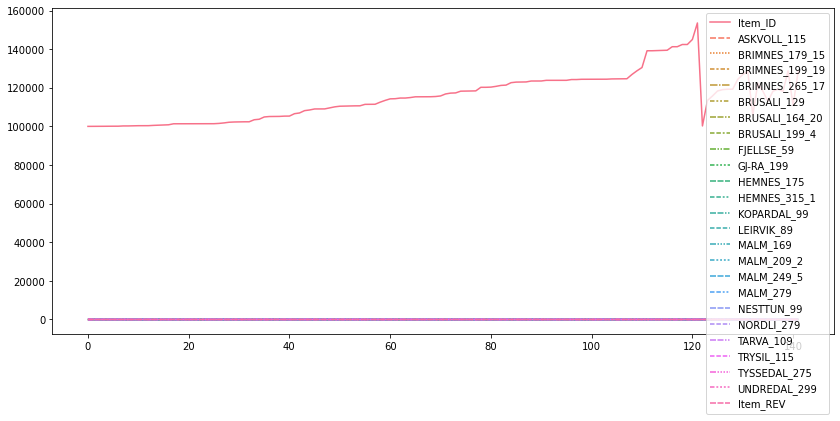

In [27]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Line chart showing how screws' measuments differ 
sns.lineplot(data=DB_df);

In [28]:
DB_df1 = DB_df.set_index('Item_ID')

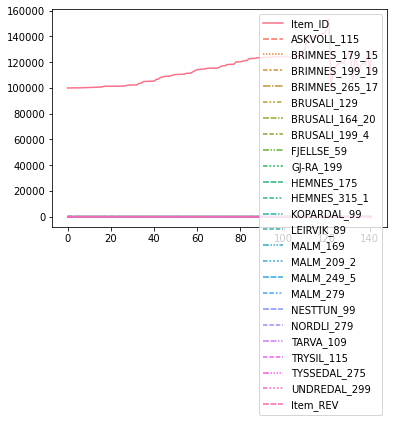

In [29]:
# Line chart showing how screws' measuments differ 
sns.lineplot(data=DB_df);

In [30]:
import numpy as np
# we can put this in a function and apply it to each row
def is_outlier(length, mean=1, std=1, threshold=1):
    threshold = 3
    z = (length-mean)/std
    return z > threshold


In [31]:
#
threshold = 3
mean = np.mean(DB_df.ASKVOLL_115)
std = np.std(DB_df.ASKVOLL_115)
# apply the function against the dataframe and print the outliers
DB_df[DB_df['ASKVOLL_115'].apply(is_outlier, mean=mean, std=std, threshold=threshold)]

,Item_ID,ASKVOLL_115,BRIMNES_179_15,BRIMNES_199_19,BRIMNES_265_17,BRUSALI_129,BRUSALI_164_20,BRUSALI_199_4,FJELLSE_59,GJ-RA_199,...,MALM_209_2,MALM_249_5,MALM_279,NESTTUN_99,NORDLI_279,TARVA_109,TRYSIL_115,TYSSEDAL_275,UNDREDAL_299,Item_REV
130,126860,20,20,20,20,16,16,16,0,20,...,20,20,0,0,0,0,50,0,20,1
140,110789,20,20,20,20,16,16,16,0,20,...,20,20,0,0,0,0,50,0,20,2


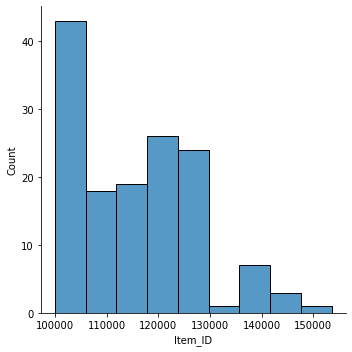

In [32]:
# Histogram 
chart = sns.displot(DB_df['Item_ID'], kde=False);
print (chart)

In [33]:
sorted(DB_df['ASKVOLL_115'])

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 4,
 4,
 8,
 8,
 8,
 8,
 8,
 20,
 20]

In [35]:
# SB_df = pd.read_csv('SBmatrixc.csv',encoding = 'unicode_escape')
SB_df = pd.read_csv('SBmatrixc.csv')
SB_df.head()

,Unnamed: 0,FJELLSE_45_,HEMNES_150_,HEMNES_220_31,MALM_125_36,MALM_139_30,NORDLI_189_,TARVA_75_,Nan
0,100001,1,Nan,NaN,NaN,NaN,NaN,1.0,Nan
1,100006,0,Nan,NaN,NaN,1.0,NaN,NaN,Nan
2,100049,0,Nan,NaN,1.0,1.0,NaN,NaN,Nan
3,100087,0,4,4.0,NaN,NaN,NaN,NaN,Nan
4,100089,0,1,1.0,NaN,NaN,NaN,NaN,Nan


In [36]:
#check column  'Nan' as from head print seem to have no ral data
sorted(SB_df['Nan'])

['Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan',
 'Nan']

In [37]:
# remove in place the column 'Nan'
SB_df.drop('Nan', 1, inplace=True)
#confirm column was deleted
SB_df.columns 

Index(['Unnamed: 0', 'FJELLSE_45_', 'HEMNES_150_', 'HEMNES_220_31',
       'MALM_125_36', 'MALM_139_30', 'NORDLI_189_', 'TARVA_75_'],
      dtype='object')

In [38]:
# rename columns to notmalise them
SB_df.rename(columns = {'Unnamed: 0'  : 'Item_ID', 
                        'FJELLSE_45_' : 'FJELLSE_45', 
                        'HEMNES_150_' : 'HEMNES_150', 
                        'NORDLI_189_' : 'NORDLI_189', 
                        'TARVA_75_'   : 'TARVA_75'
                       }, inplace=True)
#
#confirm columns were reamed
SB_df.columns 

Index(['Item_ID', 'FJELLSE_45', 'HEMNES_150', 'HEMNES_220_31', 'MALM_125_36',
       'MALM_139_30', 'NORDLI_189', 'TARVA_75'],
      dtype='object')

In [40]:
# get the shape of the dataset
SB_df.shape

(50, 8)

In [44]:
# define a search to look for ID's where the number of digits is greater than 6
find_ID_SB = SB_df.Item_ID.str.len() > 6 # will return bool
#find_ID_SB

In [47]:
# use find function and print entire dataset matching the criteria
SB_df[find_ID_SB]
# use Dtale for clarity
dtale.show(SB_df[find_ID_SB])
# print(SB_df[find_ID_SB])

In [48]:
# compare ID's longer than 6digits from bot datasets to see if they are arranged in the same order when they have "/"
# show screenshots side by side
from IPython.display import HTML, display
display(HTML("<table><tr><td><img src='DB_id_check.PNG'></td><td><img src='SB_id_check.PNG'></td></tr></table>"))

,


Executing shutdown due to inactivity...


2022-03-20 14:42:14,873 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2022-03-20 14:42:43,367 - INFO     - Executing shutdown...


In [ ]:
# from above screenshots there are two IDS that seem to appear on both datasets and the numbers are matching
# in this case while the original ID column in both datasets have multiple ID's I will be introducing
# a new column named "Unique_ID" that will have the values "ID" concatenated with the last six digits
# of the original ID number, this will ensure that counting the parts it will return the correct numbers even if duplicated
#
# at this point I will return to the original DB_df dataset and introduce 